**Hate Speech Detection Project By Akash Kumar,**

# **Problem Statement:**

With the rise of social media, hate speech spreads rapidly, targeting individuals or groups and creating a hostile environment. Manual monitoring is impractical, and simple keyword filters often fail to detect context or subtle offensive language.

This project aims to build an automated NLP system to detect and classify hate speech in text, helping online platforms moderate content and ensure safer communication.

In [65]:
# import the essential libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [66]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("waalbannyantudre/hate-speech-detection-curated-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hate-speech-detection-curated-dataset' dataset.
Path to dataset files: /kaggle/input/hate-speech-detection-curated-dataset


In [67]:
import os

# List files in the downloaded directory to find the CSV file
print(f"Contents of the downloaded dataset directory: {os.listdir(path)}")

csv_filename = 'HateSpeechDatasetBalanced.csv'
# If the above doesn't work, we'll need to inspect `os.listdir(path)` output.

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, csv_filename)

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first 5 rows of the dataset
print('The dataset contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
print('Attributes in the dataset: ', df.columns.values)
display(df.head())

Contents of the downloaded dataset directory: ['HateSpeechDatasetBalanced.csv', 'HateSpeechDataset.csv']
The dataset contains 726119 rows and 2 columns.
Attributes in the dataset:  ['Content' 'Label']


,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [68]:
df.tail()

,Content,Label
726114,i mute this telecasting and played kanye west ...,1
726115,but hell yeah he s not a bachelor but looooooo...,1
726116,great video musician but s not my musician lol...,1
726117,not great pop video yeah he s not a pedophile ...,1
726118,great video yeah he s non a paedophile lolllll...,1


In [69]:
# Dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726119 entries, 0 to 726118
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  726119 non-null  object
 1   Label    726119 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ MB
None


Label
1    364525
0    361594
Name: count, dtype: int64


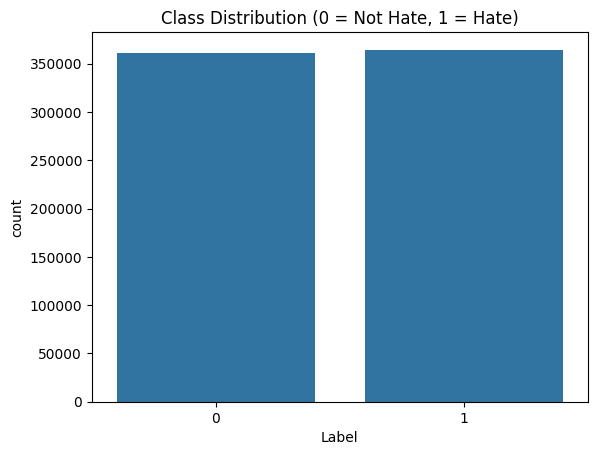

In [70]:
# Class distribution
print(df['Label'].value_counts())
sns.countplot(x='Label', data=df)
plt.title("Class Distribution (0 = Not Hate, 1 = Hate)")
plt.show()

The value counts for the 'Label' column, showing the distribution of hate speech (1) and non-hate speech (0) comments. It then uses seaborn to create a countplot visualization of this distribution.

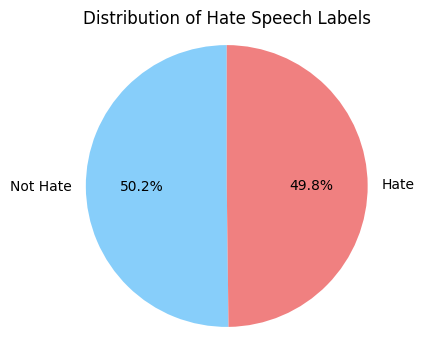

In [71]:
label_counts = df['Label'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(label_counts, labels=['Not Hate', 'Hate'], autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightcoral'])
plt.title('Distribution of Hate Speech Labels')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This cell calculates the counts for each label in the 'Label' column and then generates a pie chart to visually represent the distribution of 'Not Hate' and 'Hate' comments, showing their percentages.

In [72]:
# load SpaCy libraries and the language model (large model)
import spacy
nlp = spacy.load('en_core_web_lg')

In [73]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [74]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Data preprocessing

In [75]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['Content'] = df['Content'].apply(preprocess)

It defines a `preprocess` function that performs several steps to clean and prepare text data. It converts text to lowercase, removes URLs and non-alphabetic characters, and then lemmatizes words while removing common stop words. Finally, this function is applied to the 'Content' column of the DataFrame, updating it with the cleaned text.

# **Train-Test Spilt And Tfidf**

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df['Content']
y = df['Label']

vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     72043
           1       0.81      0.81      0.81     73181

    accuracy                           0.81    145224
   macro avg       0.81      0.81      0.81    145224
weighted avg       0.81      0.81      0.81    145224

[[58207 13836]
 [14158 59023]]


The classification report provides a detailed breakdown of the model's performance for each class (0 = Not Hate, 1 = Hate):

*   **Precision:** Indicates the accuracy of positive predictions. For example, a precision of 0.80 for 'Not Hate' means that when the model predicts a comment is 'Not Hate', it is correct 80% of the time.
*   **Recall:** Also known as sensitivity or true positive rate, it measures the proportion of actual positive cases that are correctly identified. A recall of 0.81 for 'Not Hate' means the model correctly identified 81% of all actual 'Not Hate' comments.
*   **F1-score:** The harmonic mean of precision and recall. It gives a more balanced measure, especially when there's an uneven class distribution. An F1-score of 0.81 for both classes indicates a good balance between precision and recall.
*   **Support:** The number of actual occurrences of each class in the specified dataset (e.g., `72043` for 'Not Hate' and `73181` for 'Hate' in the test set).
*   **Accuracy:** The proportion of total predictions that were correct (0.81, or 81% of comments were classified correctly overall).
*   **Macro Avg:** The average of precision, recall, and F1-score across both classes, treating each class equally.
*   **Weighted Avg:** The average of precision, recall, and F1-score across both classes, weighted by the support (number of instances) for each class.

In summary, the model shows a consistent performance with around 81% accuracy, precision, and recall for both 'Not Hate' and 'Hate' classifications, suggesting it's doing a good job of identifying and distinguishing between the two categories.

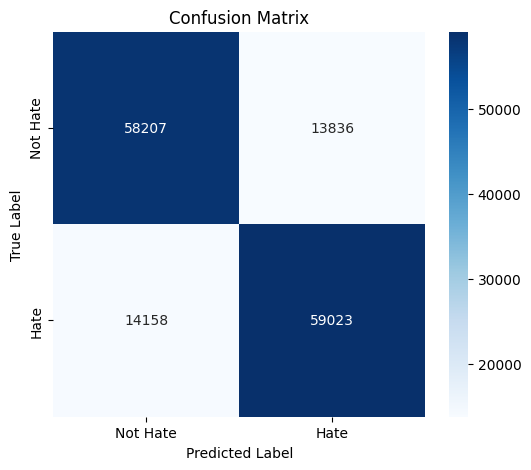

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hate', 'Hate'], yticklabels=['Not Hate', 'Hate'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Test The Model**

In [83]:
def predict_text(text):
    text = preprocess(text)
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    return "Hate Speech" if pred==1 else "Not Hate"

print(predict_text("i hate you"))


Not Hate


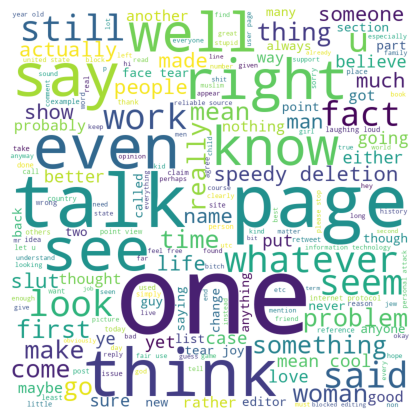

In [85]:
from wordcloud import WordCloud

# Combine all preprocessed content into a single string
all_words = ' '.join(df['Content'])

# create a word cloud image
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_words)

# Display the image:
plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()